In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('train_cleaned.csv')

## Segregating Variables independant and dependant

In [3]:
x=data.drop(['Item_Outlet_Sales'],axis=1)
y=data['Item_Outlet_Sales']
x.shape,y.shape

((8523, 45), (8523,))

## Scaling the data

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [5]:
px=pd.DataFrame(x_scaled)

In [6]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56)

## Implementing KNN Regressor

In [7]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [8]:
# Creating instance of KNN and metric mse
reg=KNN(n_neighbors=5)

# Fitting the model
reg.fit(train_x,train_y)

# Predicting over train set and calculating mse
test_predict=reg.predict(test_x)
k=mse(test_predict,test_y)
print('Test MSE  ',k)

Test MSE   1668952.5550885776


## Elbow for Classifier

In [9]:
def Elbow(K):
    test_mse=[]
    
    #training model for every value of k
    for i in K:
        #instance of KNN
        reg= KNN(n_neighbors=i)
        reg.fit(train_x,train_y)
        # Appending F1 scores to empty list calculated using the predictions
        tmp=reg.predict(test_x)
        tmp=mse(tmp,test_y)
        error=1-tmp
        test_mse.append(tmp)
    return test_mse

In [10]:
# Defining k range
k= range(1,40)

In [11]:
# Calling above defined function
test=Elbow(k)

Text(0.5, 1.0, 'elbow Curve for test')

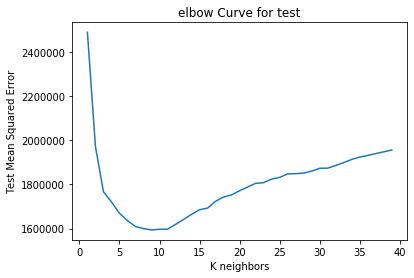

In [12]:
# plotting the curves
plt.plot(k,test)
plt.xlabel('K neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('elbow Curve for test')

In [14]:
 #Creating instance of KNN and metric mse
reg=KNN(n_neighbors=9)

# Fitting the model
reg.fit(train_x,train_y)

# Predicting over train set and calculating mse
test_predict=reg.predict(test_x)
k=mse(test_predict,test_y)
print('Test MSE  ',k)

Test MSE   1593641.2328601896
